# Ninth homework for computational mathematics course

In [61]:
import numpy as np
import pylab as plt

In [56]:
def norm(vec):
    return np.max(np.abs(vec))

## Exercise 1

In [76]:
def Jac(A, b, x0, eps=1e-5, MAX_ITER=1000, show=False):
    x = x0.T
    D = np.diag(A)
    LU = A - np.diag(D)

    numberOfIter = 0
    while( numberOfIter < MAX_ITER and norm(np.dot(A, x) - b) > eps):
        x = ((1/D)*(b - LU@x)).T
        numberOfIter += 1
    if show:
        print("Number of iterations is ", numberOfIter) 
        print("Error is ", norm(A@x - b))
    return x, numberOfIter

def genAf(n, alpha):
    A = np.zeros((n,n))
    f = np.zeros(n)
    
    i,j = np.indices(A.shape)
    
    A[i==j] = 2
    A[j==i+1] = -1-alpha
    A[j==i-1] = -1+alpha
    
    f[0] = 1-alpha
    f[n-1] = 1+alpha
    return A, f

In [58]:
n = 10
alpha = 0.2
A, b = genAf(n, alpha)

Number of iterations is  181
Error is  9.34481335601589e-06


/tmp/ipykernel_1021295/1678157832.py:8: RuntimeWarning: overflow encountered in matmul
  x = ((1/D)*(b - LU@x)).T


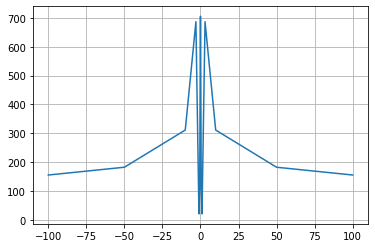

In [63]:
ns = np.arange(5, 35, 3)
alphas = [-100, -50, -10, -3, -1, -0.5, -0.1, 0, 0.1, 0.5, 1, 3, 10, 50, 100]

niters = []
n = 20
for alpha in alphas:
    A, b = genAf(n, alpha)
    x, its = solution(A, b, b)
    niters.append(its)
    
plt.plot(alphas, niters)
plt.grid()
plt.show()

/tmp/ipykernel_1021295/1678157832.py:8: RuntimeWarning: overflow encountered in matmul
  x = ((1/D)*(b - LU@x)).T


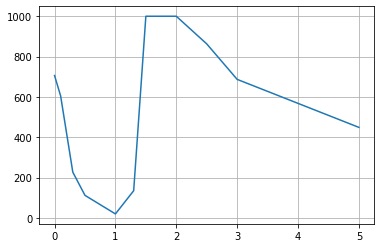

In [68]:
alphas = [0, 0.1, 0.3, 0.5, 1, 1.3, 1.5, 1.8, 2, 2.5, 3, 5]

niters = []
n = 20
for alpha in alphas:
    A, b = genAf(n, alpha)
    x, its = solution(A, b, b)
    niters.append(its)
    
plt.plot(alphas, niters)
plt.grid()
plt.show()

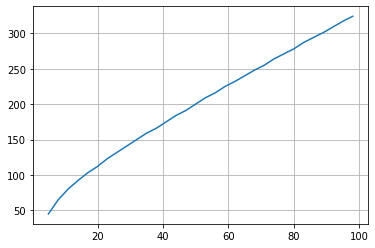

In [84]:
ns = np.arange(5, 100, 3)

Jniters = []
alpha = 0.5
for n in ns:
    A, b = genAf(n, alpha)
    x, its = Jac(A, b, b)
    Jniters.append(its)
    
plt.plot(ns, Jniters)
plt.grid()
plt.show()

## Exercise 2

In [81]:
def Sei(A, b, x0, eps=1e-5, MAX_ITER=1000, show=False):
    x = x0
    m = len(x)

    numberOfIter = 0
    while( numberOfIter < MAX_ITER and norm(np.dot(A, x.T) - b) > eps):
        x_new = x.copy()
        for i in range(m):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, m))
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
        
        x = x_new
        numberOfIter += 1
    if show:
        print("Number of iterations is ", numberOfIter) 
        print("Error is ", norm(A@(x.T) - b))
    return x, numberOfIter

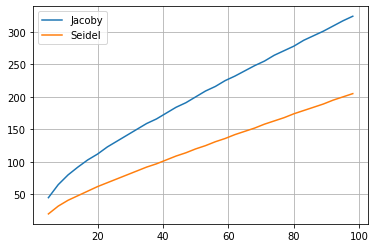

In [86]:
ns = np.arange(5, 100, 3)

Sniters = []
alpha = 0.5
for n in ns:
    A, b = genAf(n, alpha)
    x, its = Sei(A, b, b)
    Sniters.append(its)
    
plt.plot(ns, Jniters, label="Jacoby")
plt.plot(ns, Sniters, label="Seidel")
plt.grid()
plt.legend()
plt.show()

## Exercise 4

In [119]:
def relax(A, b, x0, tau, eps=1e-5, MAX_ITER=1000, show=False):
    x = x0
    D  = np.diag(A)
    i, j = np.indices(A.shape)
    L = np.zeros(A.shape)
    U = np.zeros(A.shape)
    L[i>j] = A[i>j]
    U[i<j] = A[i<j]
    mat = np.linalg.inv(np.diag(D) + L)

    numberOfIter = 0
    while( numberOfIter < MAX_ITER and norm(np.dot(A, x.T) - b) > eps):
        x = tau*mat@(b - np.dot(A, x.T)) + x
        numberOfIter += 1
        
    if show:
        print("Number of iterations is ", numberOfIter) 
        print("Error is ", norm(A@(x.T) - b))
    return x, numberOfIter

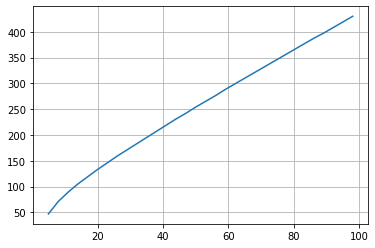

In [120]:
ns = np.arange(5, 100, 3)

niters = []
alpha = 0.5
tau = 0.5
for n in ns:
    A, b = genAf(n, alpha)
    x, its = relax(A, b, b, tau=tau)
    niters.append(its)
    
plt.plot(ns, niters)
plt.grid()
plt.show()

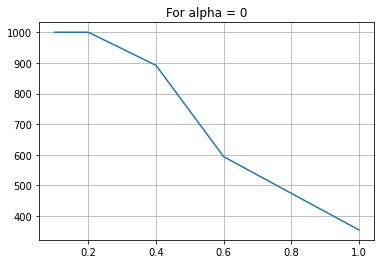

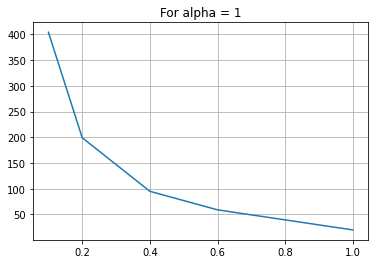

/tmp/ipykernel_1021295/3344799990.py:13: RuntimeWarning: invalid value encountered in matmul
  x = tau*mat@(b - np.dot(A, x.T)) + x


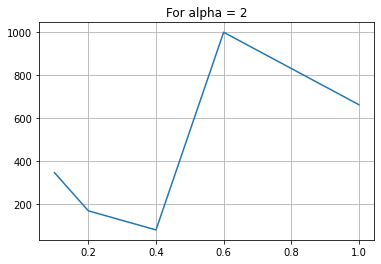

/tmp/ipykernel_1021295/3344799990.py:13: RuntimeWarning: overflow encountered in matmul
  x = tau*mat@(b - np.dot(A, x.T)) + x


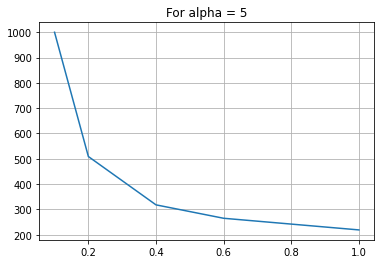

In [121]:
alphas = [0,1,2,5]
taus = [0.1, 0.2, 0.4, 0.6, 1]
n = 20
for alpha in alphas:
    niters = []
    for tau in taus:
        A, b = genAf(n, alpha)
        x, its = relax(A, b, b, tau=tau)
        niters.append(its)
    plt.plot(taus, niters)
    plt.grid()
    plt.title('For alpha = '+str(alpha))
    plt.show()

## Exercise 5

In [110]:
def uprelax(A, b, x0, tau, eps=1e-5, MAX_ITER=1000, show=False):
    x = x0
    m = len(x)

    numberOfIter = 0
    while( numberOfIter < MAX_ITER and norm(np.dot(A, x.T) - b) > eps):
        x_new = x.copy()
        for i in range(m):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, m))
            x_new[i] = tau*(b[i] - s1 - s2) / A[i][i] + (1-tau)*x[i]
        
        x = x_new
        numberOfIter += 1
    if show:
        print("Number of iterations is ", numberOfIter) 
        print("Error is ", norm(A@(x.T) - b))
    return x, numberOfIter

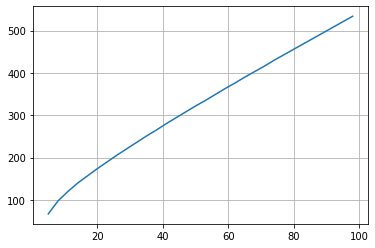

In [111]:
ns = np.arange(5, 100, 3)

urniters = []
alpha = 0.5
tau = 0.5
for n in ns:
    A, b = genAf(n, alpha)
    x, its = uprelax(A, b, b, tau=tau)
    urniters.append(its)
    
plt.plot(ns, urniters)
plt.grid()
plt.show()

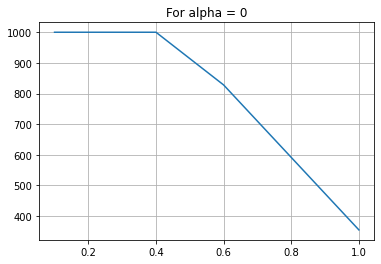

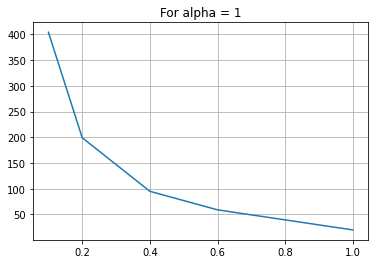

/tmp/ipykernel_1021295/2928140816.py:11: RuntimeWarning: overflow encountered in double_scalars
  x_new[i] = tau*(b[i] - s1 - s2) / A[i][i] + (1-tau)*x[i]
/tmp/ipykernel_1021295/2928140816.py:9: RuntimeWarning: invalid value encountered in double_scalars
  s1 = sum(A[i][j] * x_new[j] for j in range(i))
/tmp/ipykernel_1021295/2928140816.py:10: RuntimeWarning: overflow encountered in double_scalars
  s2 = sum(A[i][j] * x[j] for j in range(i + 1, m))


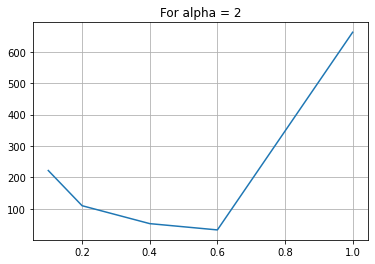

/tmp/ipykernel_1021295/2928140816.py:9: RuntimeWarning: overflow encountered in double_scalars
  s1 = sum(A[i][j] * x_new[j] for j in range(i))


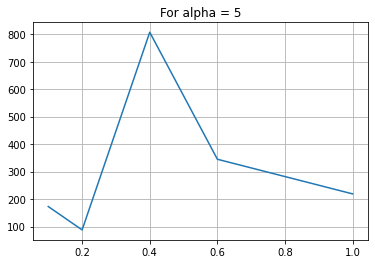

In [112]:
alphas = [0,1,2,5]
taus = [0.1, 0.2, 0.4, 0.6, 1]
n = 20
for alpha in alphas:
    niters = []
    for tau in taus:
        A, b = genAf(n, alpha)
        x, its = uprelax(A, b, b, tau=tau)
        niters.append(its)
    plt.plot(taus, niters)
    plt.grid()
    plt.title('For alpha = '+str(alpha))
    plt.show()